In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
#get data from the Penn World Tables excel file
pwt_df = pd.read_excel('pwt100.xlsx', 'Data')
#keep only the data we need
df = pwt_df[['countrycode', 'country', 'year', 'rgdpe', 'rgdpo', 'pop', 'hc', 'ctfp', 'cwtfp']]

df['country'] = df['countrycode'] + "_" + df['country']

df = df.drop(columns=['countrycode'])
CountryCount = df['country'].nunique()
df.set_index(['country', 'year'], inplace=True)
df.to_excel("ProjectData.xlsx", sheet_name='ProjectData')

C:\Users\Joshua\AppData\Local\Temp/ipykernel_3344/3074116869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['countrycode'] + "_" + df['country']


In [4]:
#Create a list of countries and years
index = df.index
countries = []
years = []
for i in index:
    countries.append(i[0])
    years.append(i[1])
    
# remove duplicates
countries = list(set(countries)) 
years = list(set(years))

In [5]:
#Calculate %change YOY in  'rgdpe', 'rgdpo', 'hc', 'ctfp', 'cwtfp'

df['popYOY'] = np.nan
df['rgdpeYOY'] = np.nan
df['rgdpoYOY'] = np.nan
df['hcYOY'] = np.nan
df['ctfpYOY'] = np.nan
df['cwtfpYOY'] = np.nan
for i in countries:
    for y in years:
        if y != 1950 and not math.isnan(y):
            df.loc[(i,y),'popYOY'] = (df.loc[(i,y),'pop'] - df.loc[(i,y - 1),'pop']) / df.loc[(i,y - 1),'pop']
            df.loc[(i,y),'rgdpeYOY'] = (df.loc[(i,y),'rgdpe'] - df.loc[(i,y - 1),'rgdpe']) / df.loc[(i,y - 1),'rgdpe']
            df.loc[(i,y),'rgdpoYOY'] = (df.loc[(i,y),'rgdpo'] - df.loc[(i,y - 1),'rgdpo']) / df.loc[(i,y - 1),'rgdpo']
            df.loc[(i,y),'hcYOY'] = (df.loc[(i,y),'hc'] - df.loc[(i,y - 1),'hc']) / df.loc[(i,y - 1),'hc']
            df.loc[(i,y),'ctfpYOY'] = (df.loc[(i,y),'ctfp'] - df.loc[(i,y - 1),'ctfp']) / df.loc[(i,y - 1),'ctfp']
            df.loc[(i,y),'cwtfpYOY'] = (df.loc[(i,y),'cwtfp'] - df.loc[(i,y - 1),'cwtfp']) / df.loc[(i,y - 1),'cwtfp']

In [6]:
# Calculate 10 year rolling averages of % YOY variables
r = df.rolling(10,10,axis=0).mean(level='country')

df['popYOY10y'] = r['popYOY']
df['rgdpeYOY10y'] = r['rgdpeYOY']
df['rgdpoYOY10y'] = r['rgdpoYOY']
df['hcYOY10y'] = r['hcYOY']
df['ctfpYOY10y'] = r['ctfpYOY']
df['cwtfpYOY10y'] = r['cwtfpYOY']

df.to_excel("RollingData.xlsx", sheet_name='RollingData')
#df

In [7]:
# Calculate the number of NaNs for each country to determine which countries to use in analysis
df['rowNaN']=df.isnull().sum(axis=1)
s = df.groupby('country')['rowNaN'].sum()
#df

s = s.sort_values(ascending=True)
s.to_excel("NANCounts.xlsx", sheet_name='NANCounts')

In [8]:
country_list = ['CAN_Canada','KEN_Kenya','FRA_France','CHE_Switzerland','PHL_Philippines','JPN_Japan','COL_Colombia',
'ITA_Italy','ISR_Israel','CRI_Costa Rica','SWE_Sweden','PER_Peru','ISL_Iceland','DEU_Germany','IRL_Ireland','IND_India',
'DNK_Denmark','PRT_Portugal','ECU_Ecuador','EGY_Egypt','ESP_Spain','GTM_Guatemala','FIN_Finland','CYP_Cyprus',
'THA_Thailand','GBR_United Kingdom','BRA_Brazil','MUS_Mauritius','ZAF_South Africa','VEN_Venezuela (Bolivarian Republic of)',
'ARG_Argentina','USA_United States','URY_Uruguay','AUS_Australia','AUT_Austria','MEX_Mexico','NLD_Netherlands',
'MAR_Morocco','NOR_Norway','BEL_Belgium','LKA_Sri Lanka','BOL_Bolivia (Plurinational State of)','NZL_New Zealand',
'TTO_Trinidad and Tobago','TUR_Turkey','LUX_Luxembourg']
df_countries = df.loc[country_list]
df_countries.to_excel("Countries.xlsx", sheet_name='Countries')

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


Text(0.5, 1.0, 'Kenya')

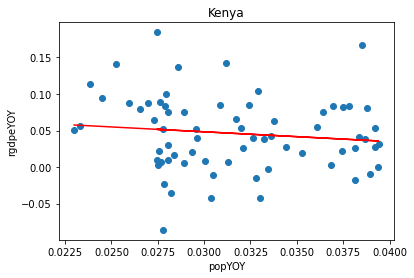

In [9]:
#define data
x = df_countries.loc['KEN_Kenya','popYOY']
y = df_countries.loc['KEN_Kenya','rgdpeYOY']
x.dropna(inplace=True)
y.dropna(inplace=True)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b, color = 'r')
plt.xlabel("popYOY")
plt.ylabel("rgdpeYOY")
plt.title("Kenya")

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


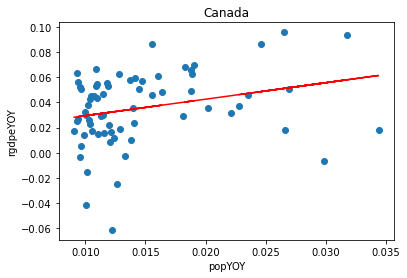

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


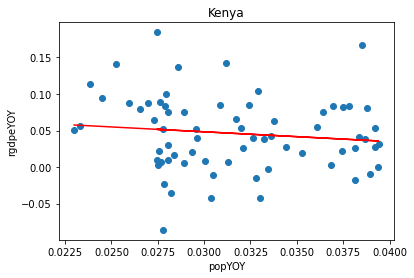

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


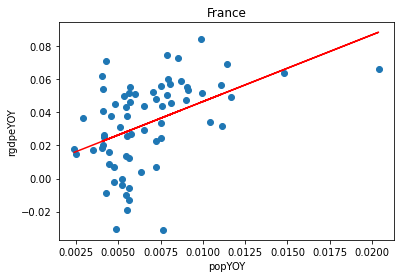

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


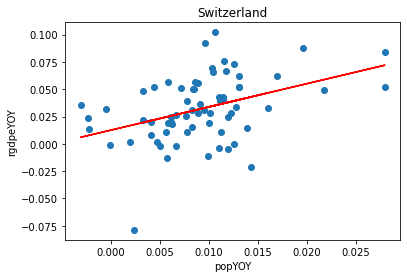

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


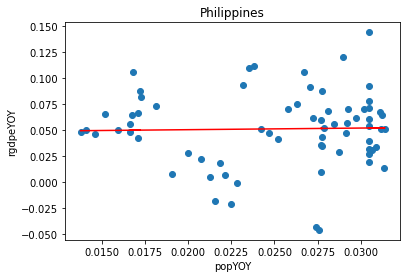

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


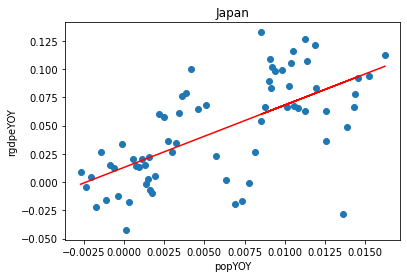

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


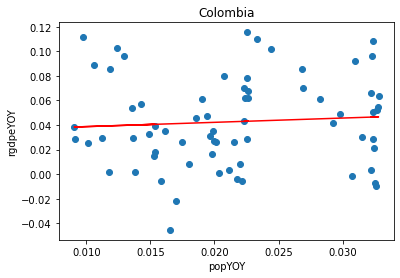

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


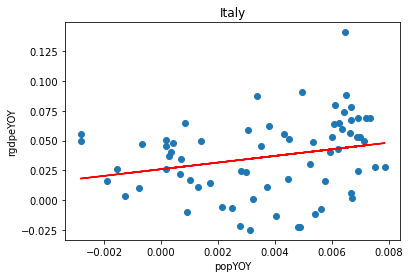

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


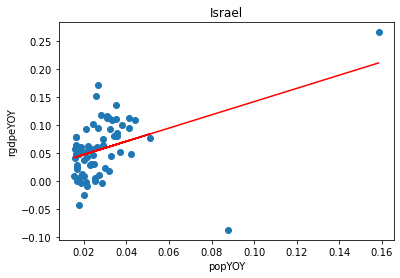

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


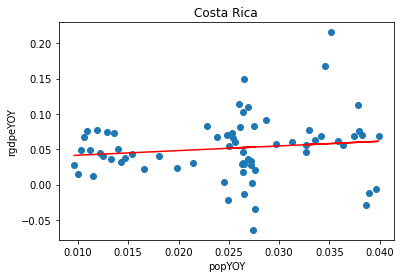

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


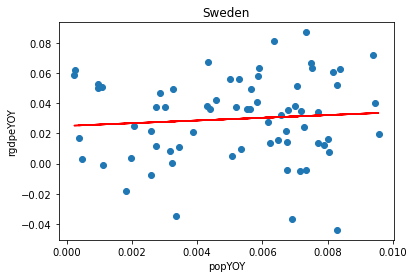

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


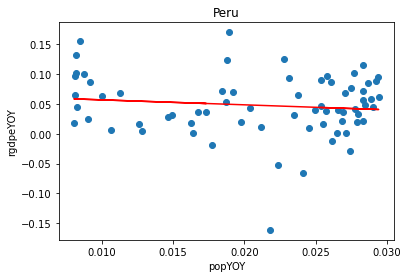

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


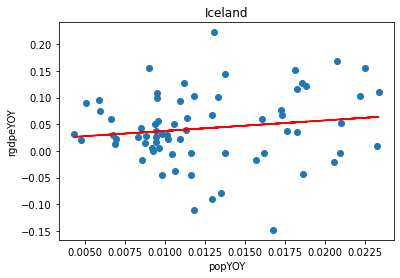

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


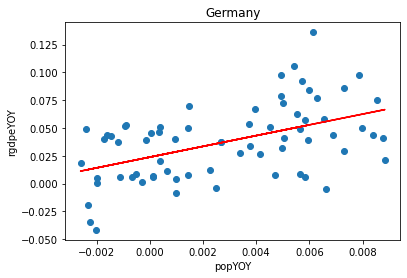

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


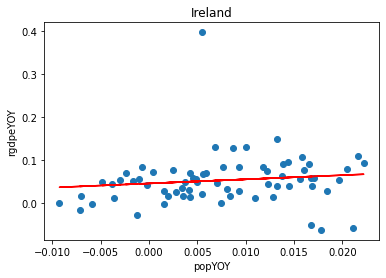

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


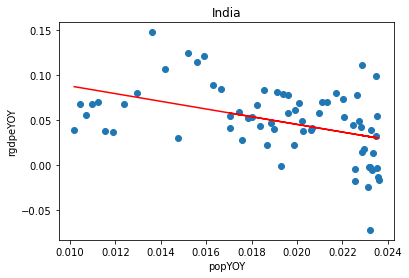

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


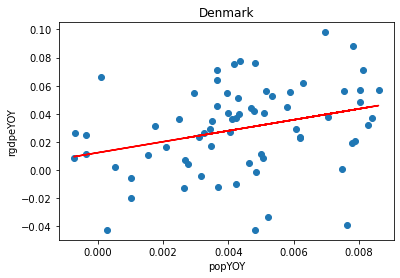

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


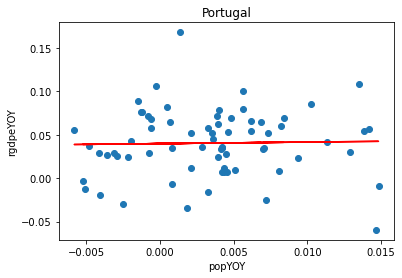

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


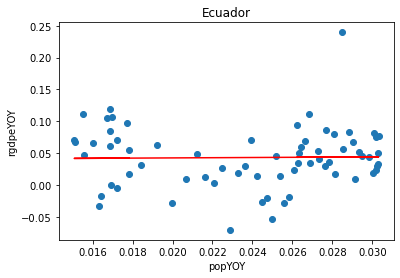

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


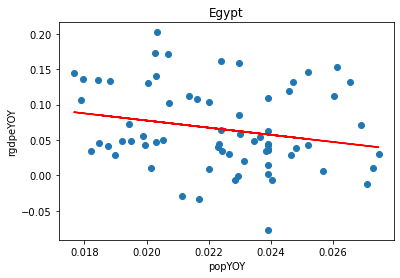

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


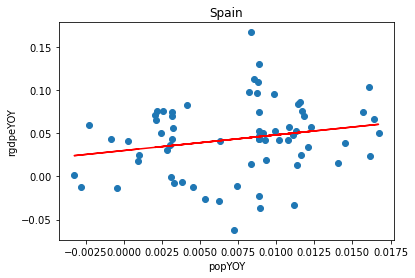

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


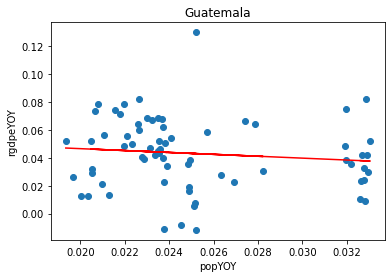

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


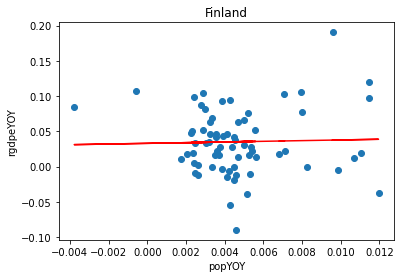

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


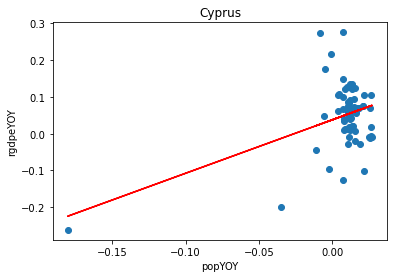

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


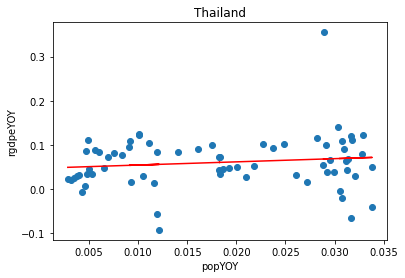

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


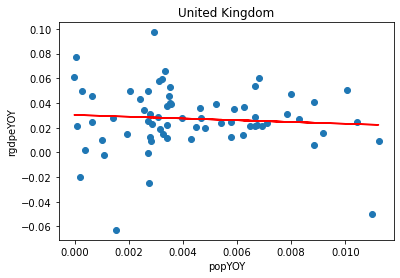

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


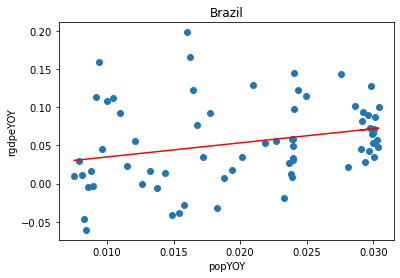

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


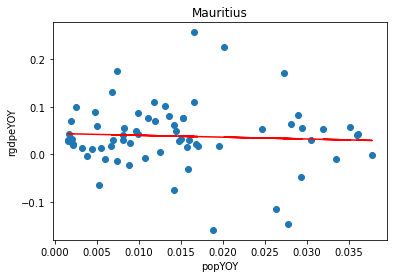

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


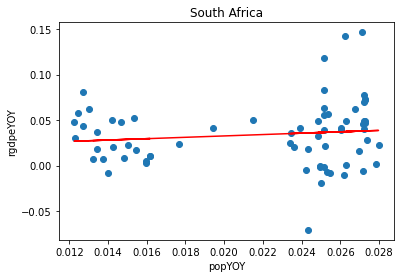

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


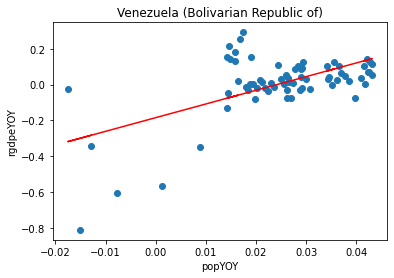

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


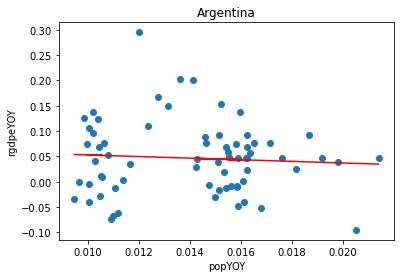

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


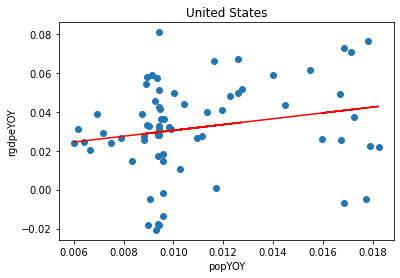

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


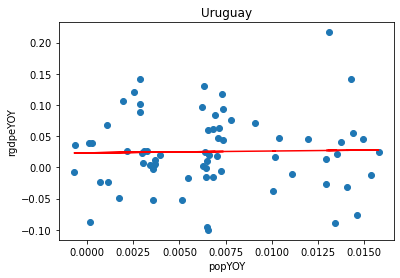

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


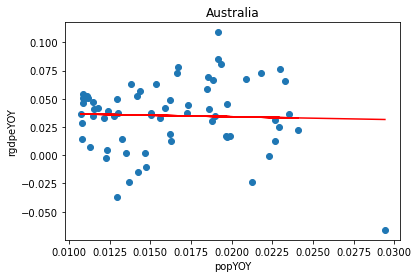

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


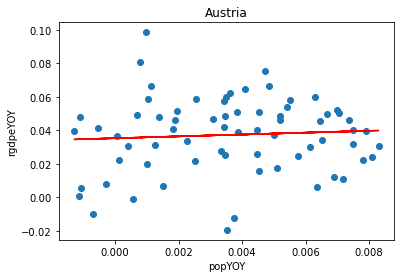

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


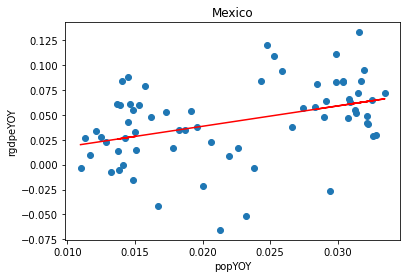

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


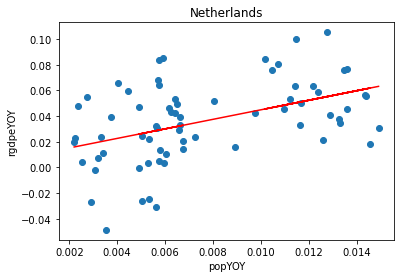

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


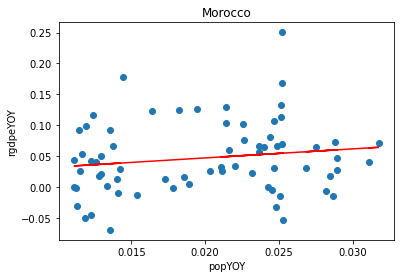

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


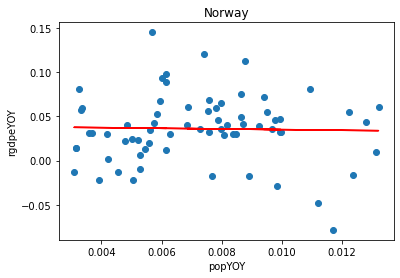

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


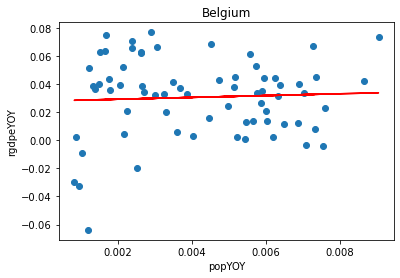

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


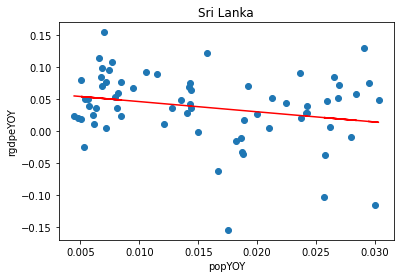

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


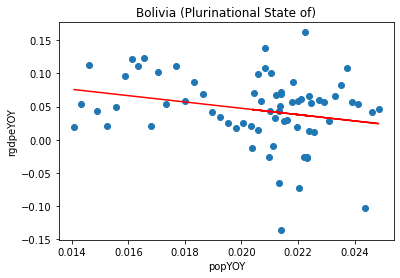

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


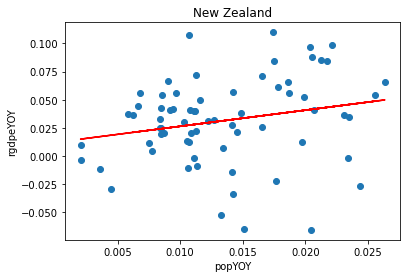

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


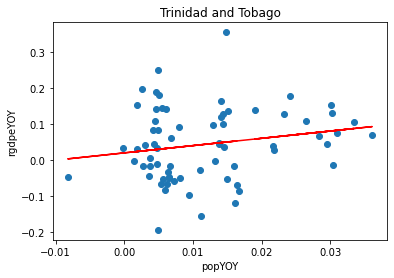

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


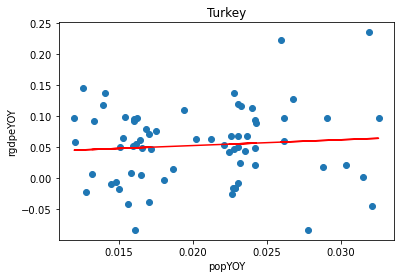

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


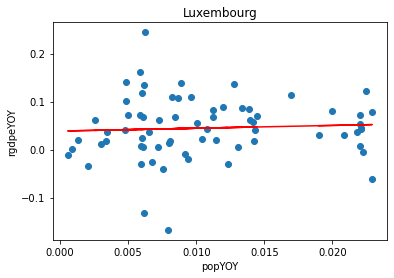

In [10]:
for i in country_list:
    #define data
    x = df_countries.loc[i,'popYOY']
    y = df_countries.loc[i,'rgdpeYOY']
    x.dropna(inplace=True)
    y.dropna(inplace=True)

    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)

    #add line of best fit to plot
    plt.plot(x, a*x+b, color = 'r')
    plt.xlabel("popYOY")
    plt.ylabel("rgdpeYOY")
    plt.title(i[4:])
    plt.show()

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


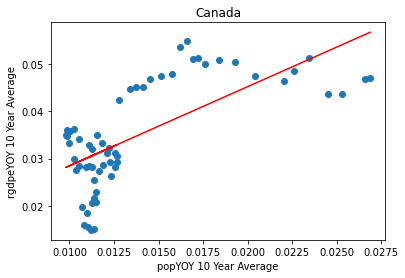

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


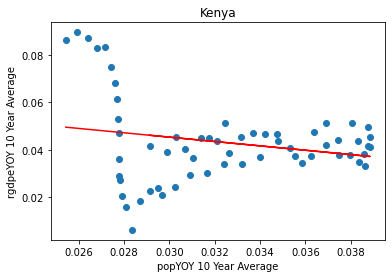

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


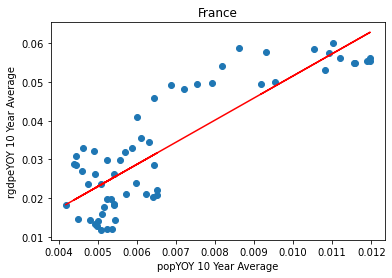

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


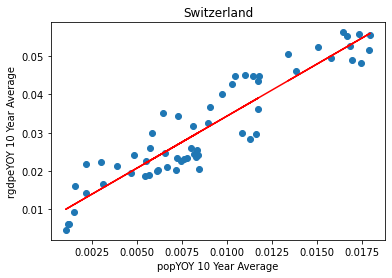

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


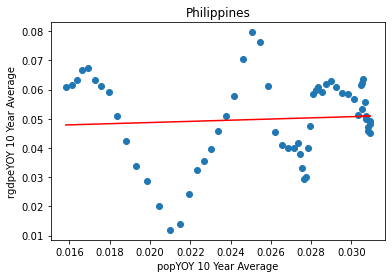

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


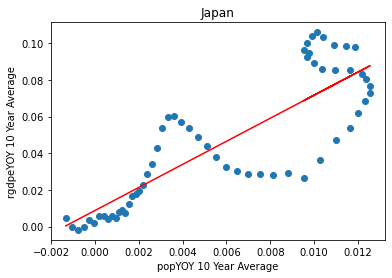

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


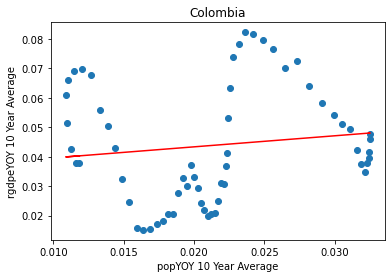

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


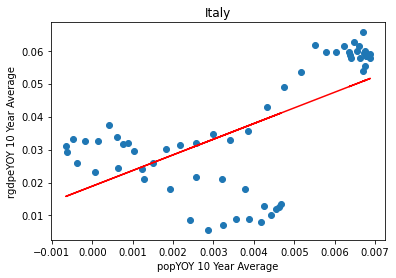

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


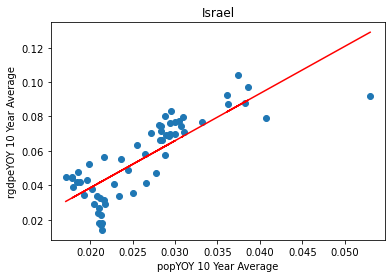

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


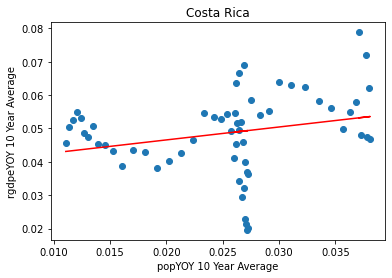

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


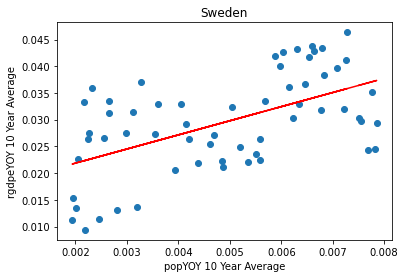

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


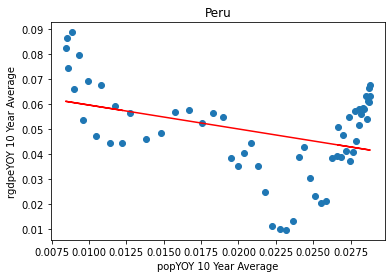

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


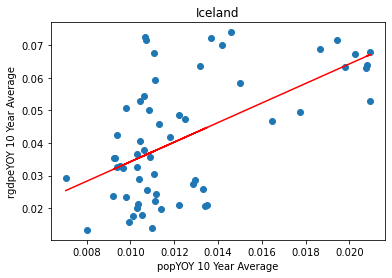

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


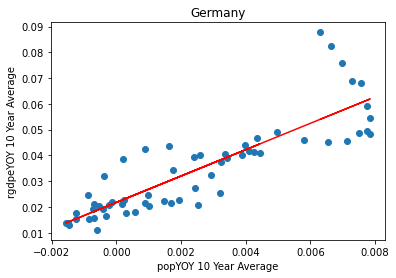

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


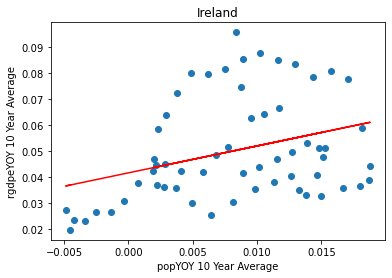

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


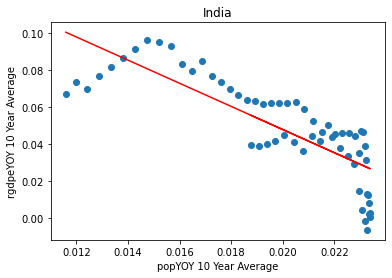

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


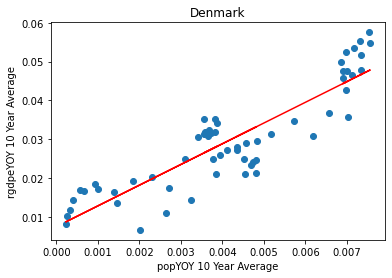

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


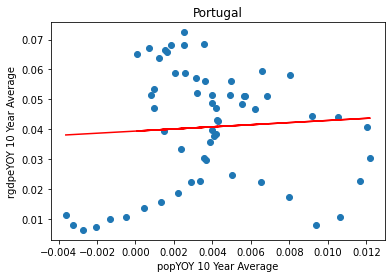

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


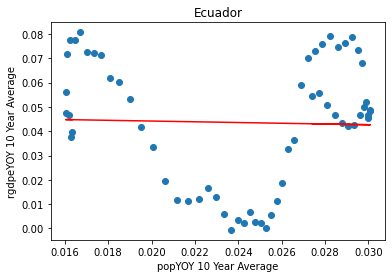

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


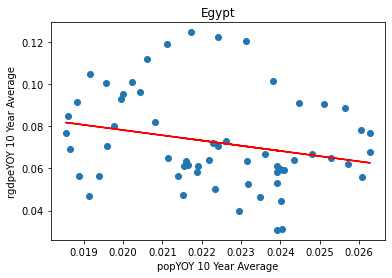

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


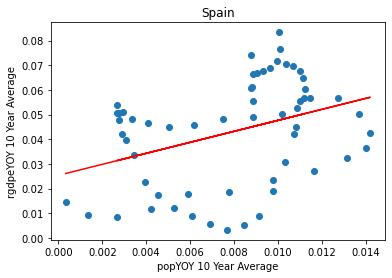

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


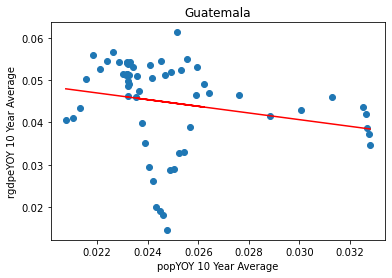

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


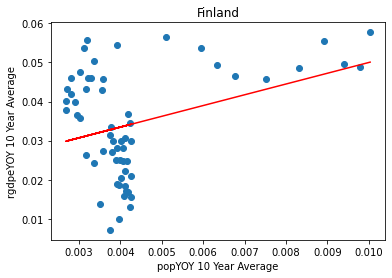

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


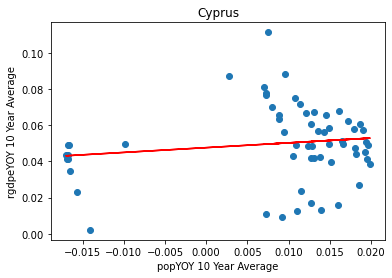

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


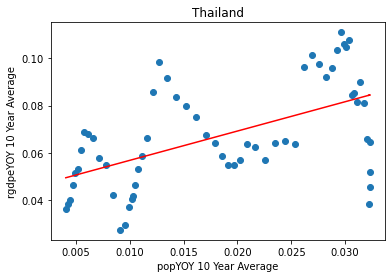

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


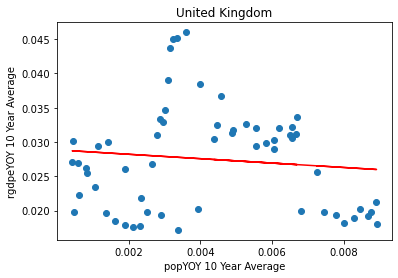

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


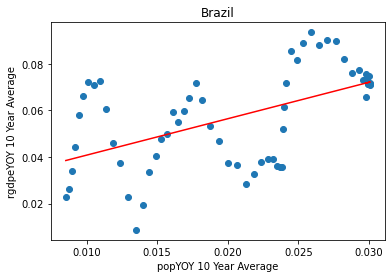

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


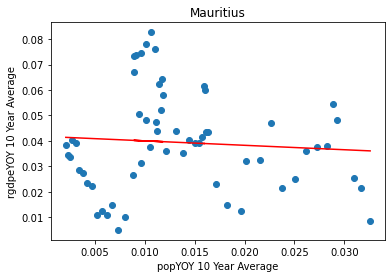

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


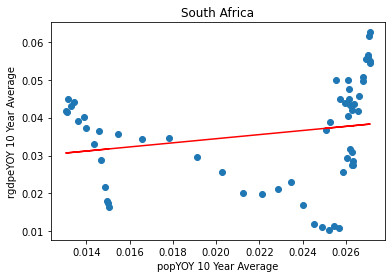

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


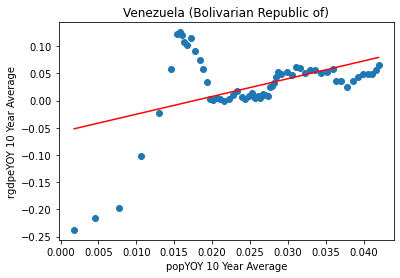

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


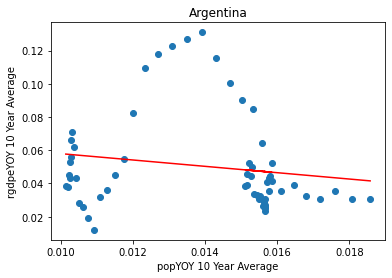

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


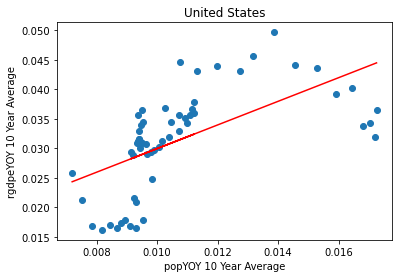

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


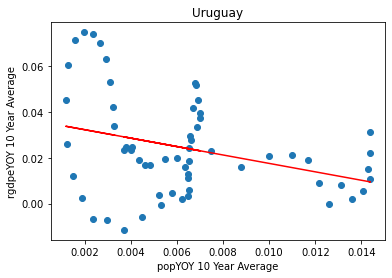

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


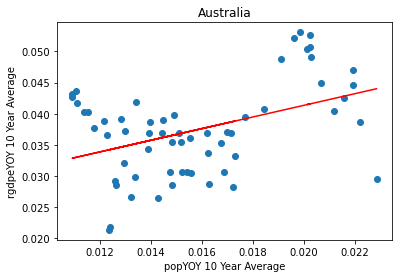

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


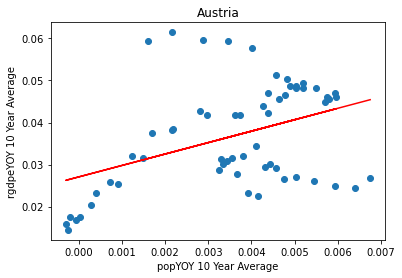

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


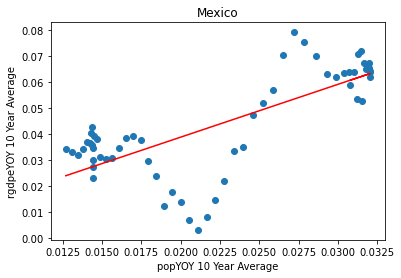

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


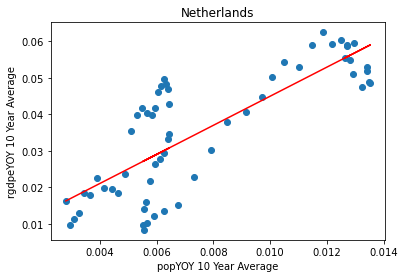

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


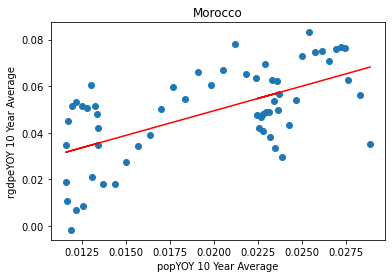

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


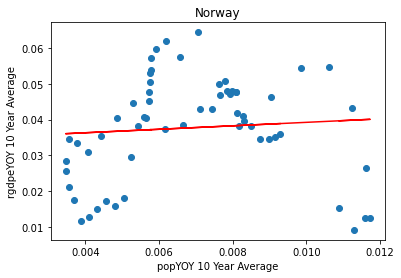

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


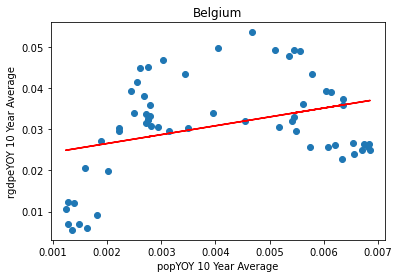

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


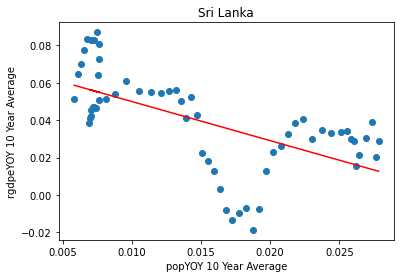

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


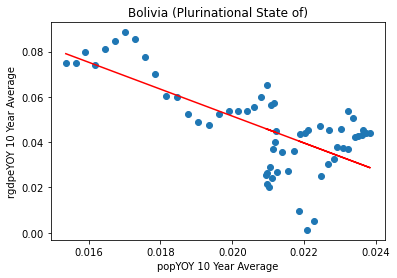

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


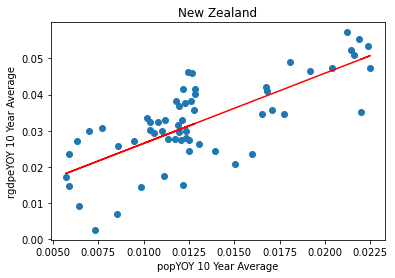

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


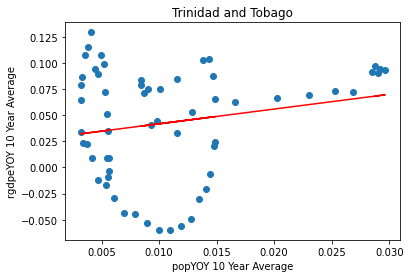

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


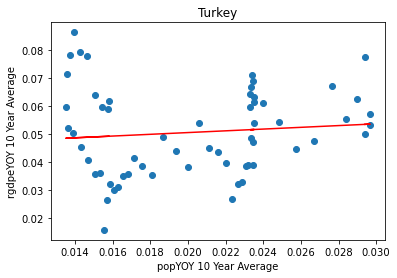

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


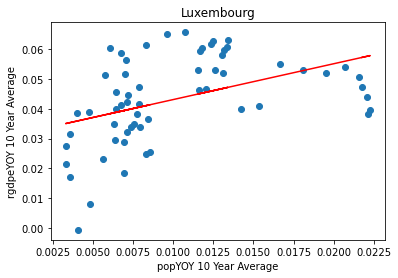

In [11]:
for i in country_list:
    #define data
    x = df_countries.loc[i,'popYOY10y']
    y = df_countries.loc[i,'rgdpeYOY10y']
    x.dropna(inplace=True)
    y.dropna(inplace=True)

    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)

    #add line of best fit to plot
    plt.plot(x, a*x+b, color = 'r')
    plt.xlabel("popYOY 10 Year Average")
    plt.ylabel("rgdpeYOY 10 Year Average")
    plt.title(i[4:])
    plt.show()

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


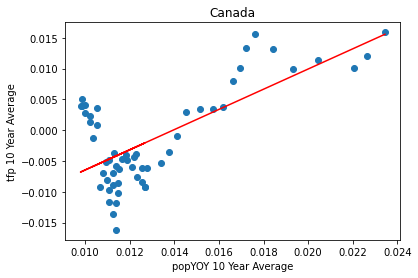

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


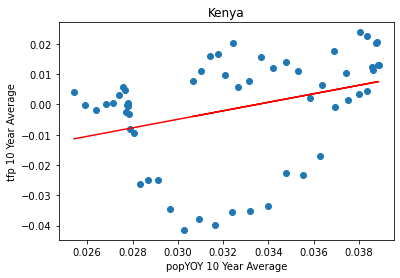

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


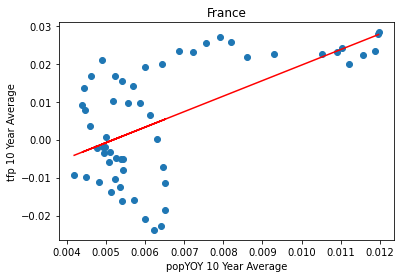

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


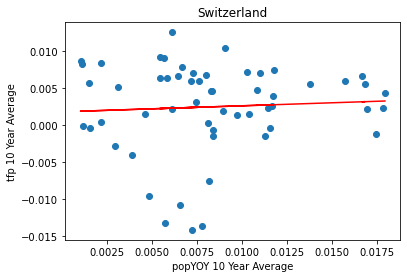

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


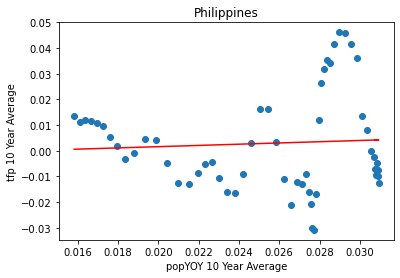

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


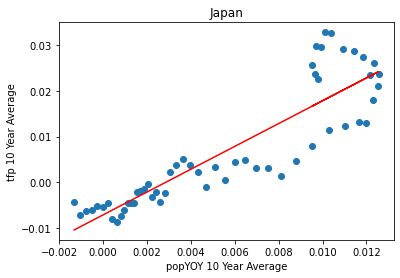

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


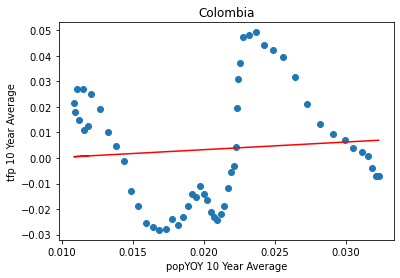

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


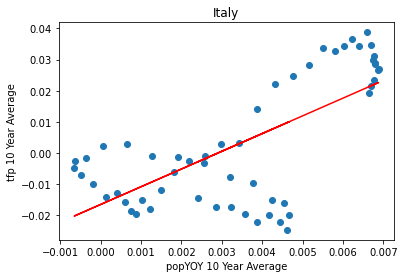

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


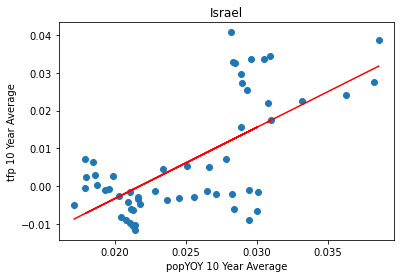

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


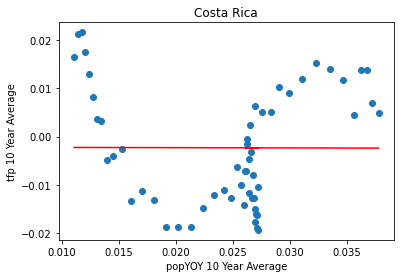

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


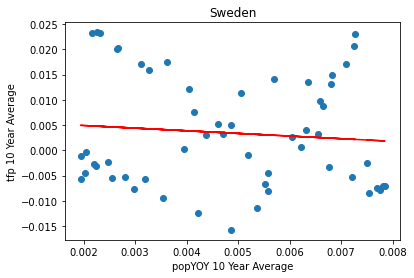

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


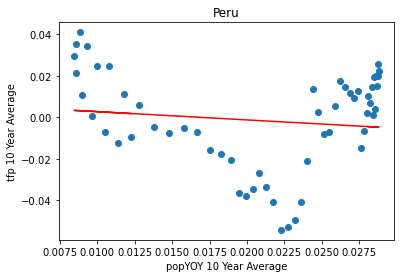

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


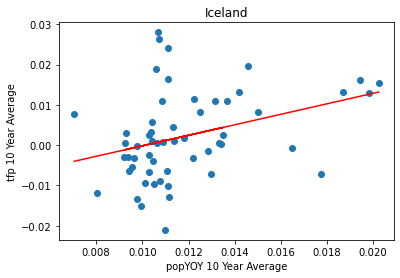

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


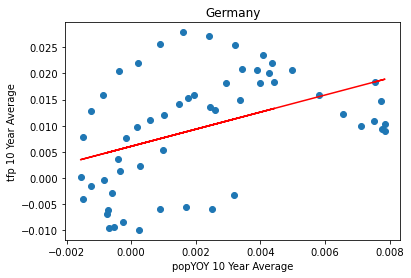

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


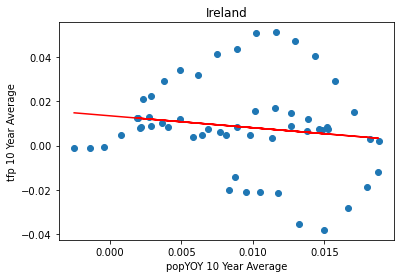

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


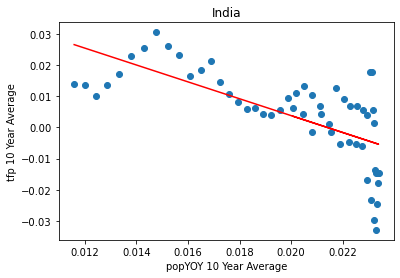

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


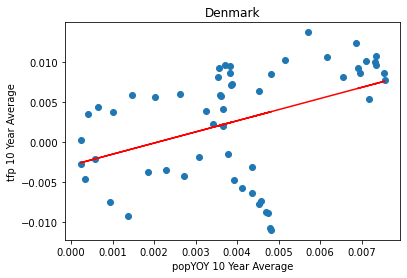

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


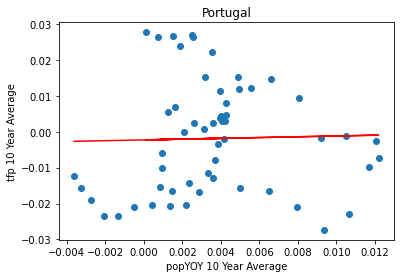

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


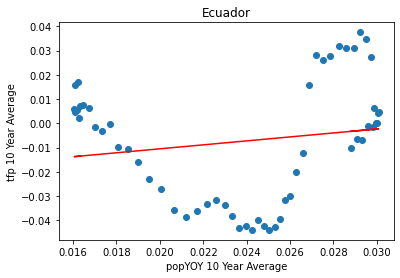

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


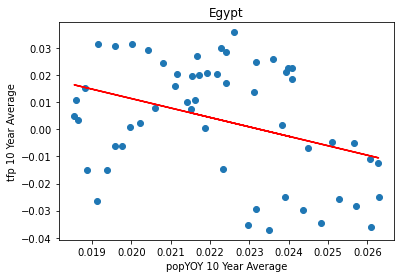

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


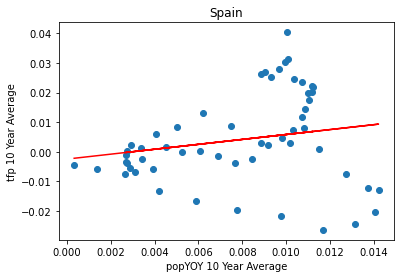

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


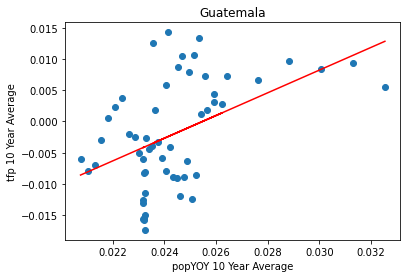

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


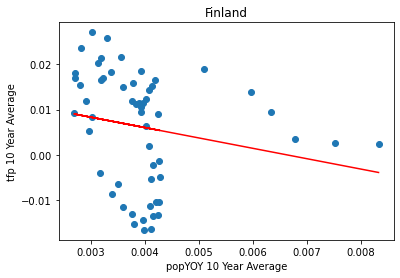

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


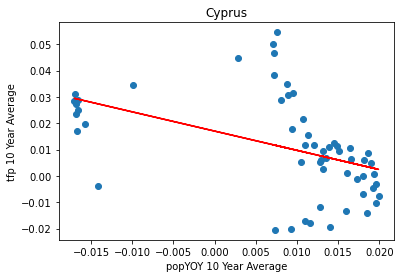

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


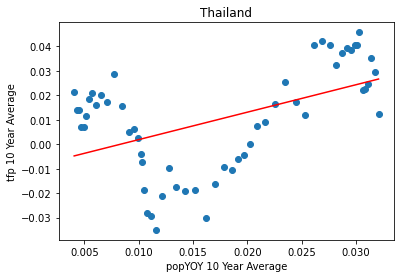

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


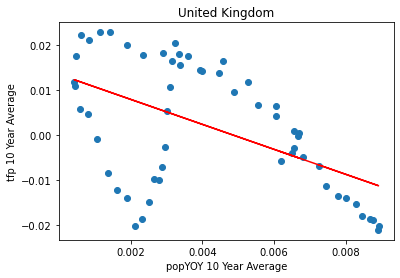

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


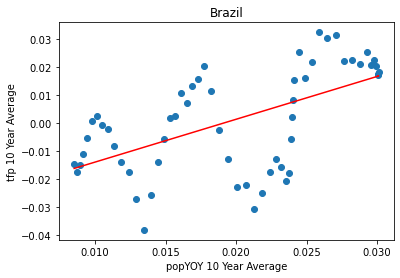

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


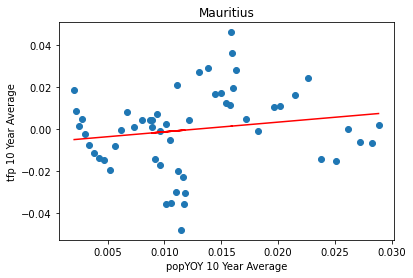

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


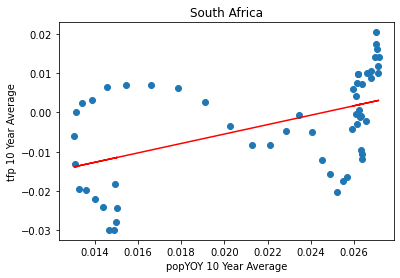

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


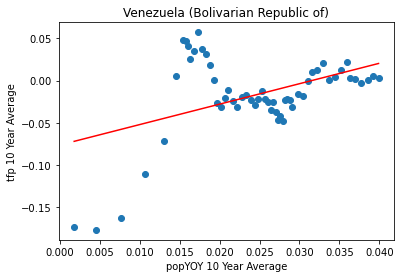

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


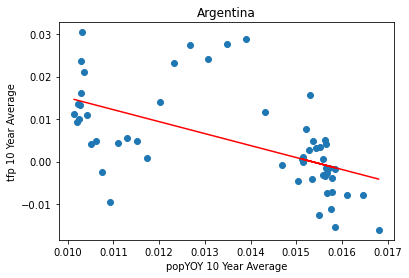

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


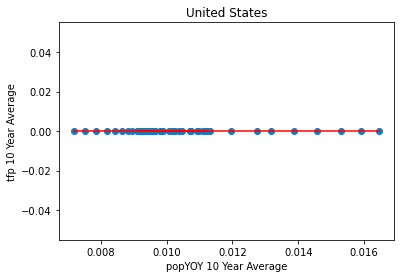

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


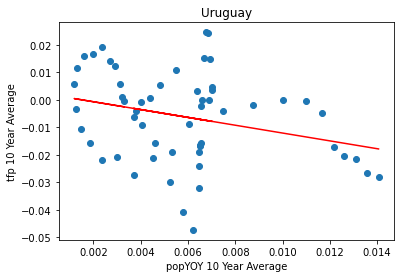

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


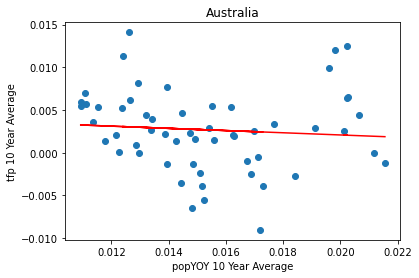

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


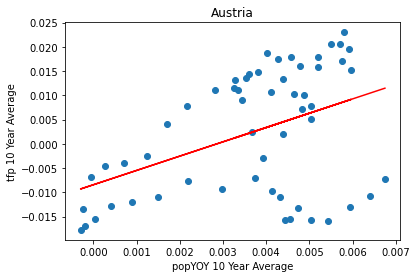

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


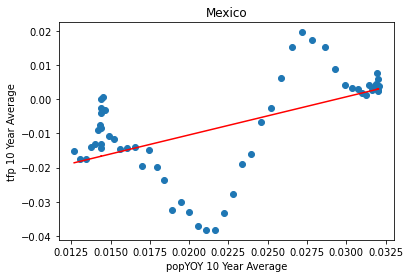

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


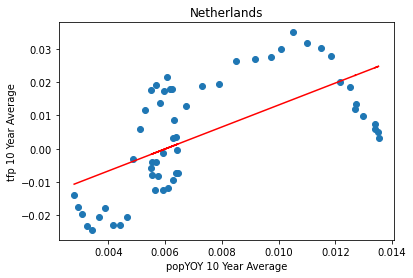

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


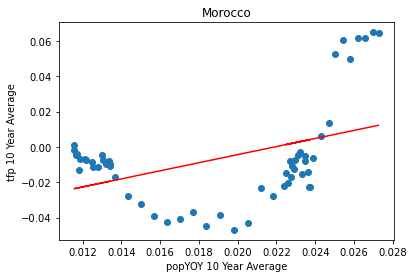

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


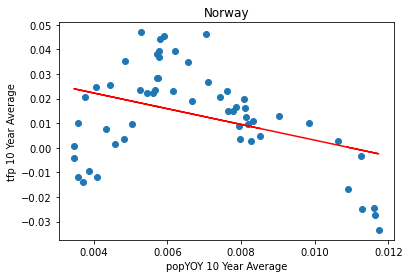

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


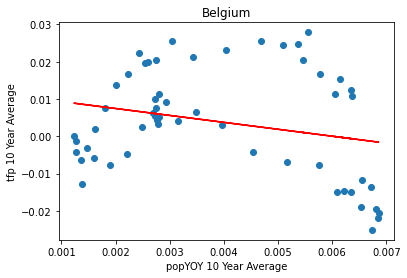

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


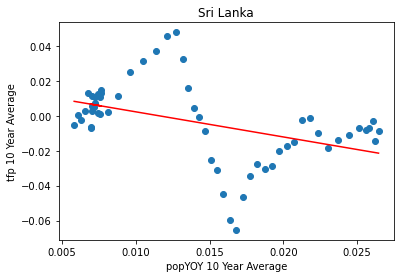

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


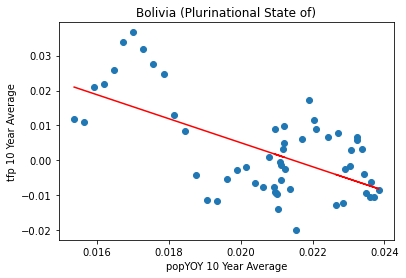

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


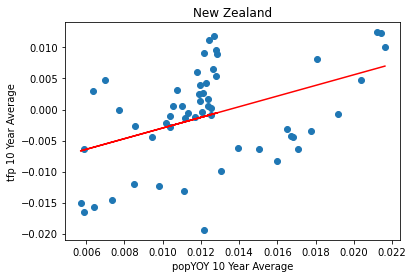

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


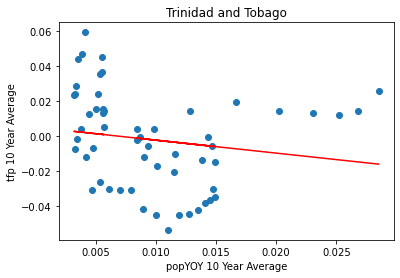

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


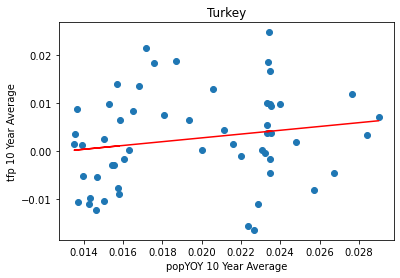

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


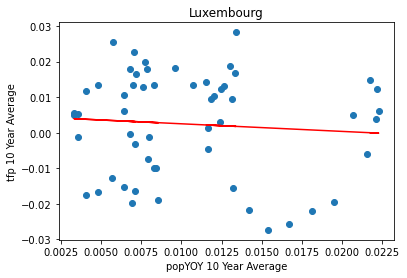

In [12]:
#Need to truncate population data so that it is the same length as the tfp data
df_tfp = df_countries[df_countries['ctfpYOY10y'].notna()]

for i in country_list:
    #define data
    x = df_tfp.loc[i,'popYOY10y']
    y = df_tfp.loc[i,'ctfpYOY10y']
    x.dropna(inplace=True)
    y.dropna(inplace=True)

    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)

    #add line of best fit to plot
    plt.plot(x, a*x+b, color = 'r')
    plt.xlabel("popYOY 10 Year Average")
    plt.ylabel("tfp 10 Year Average")
    plt.title(i[4:])
    plt.show()

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


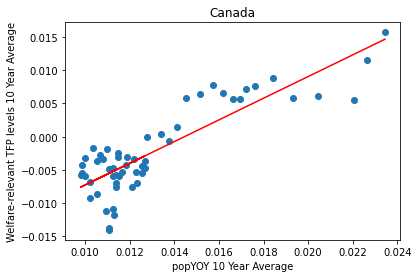

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


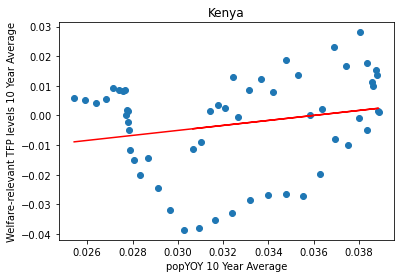

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


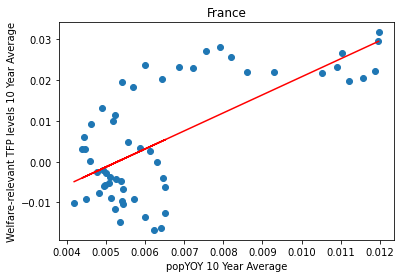

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


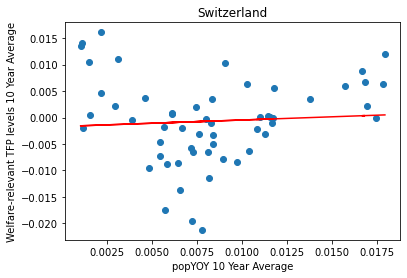

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


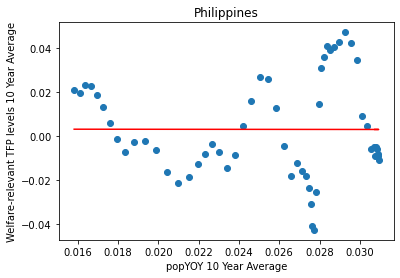

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


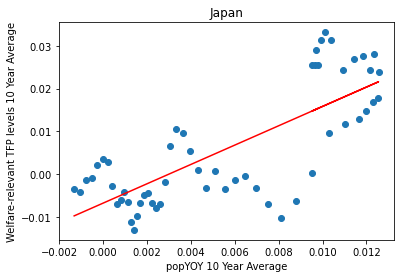

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


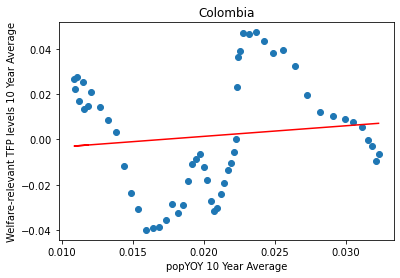

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


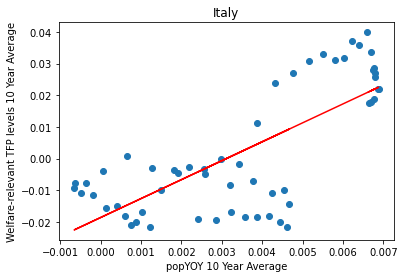

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


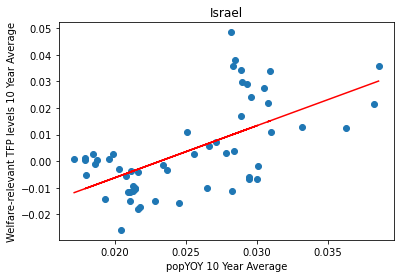

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


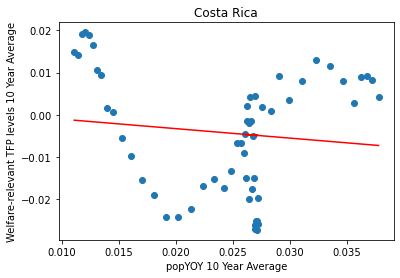

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


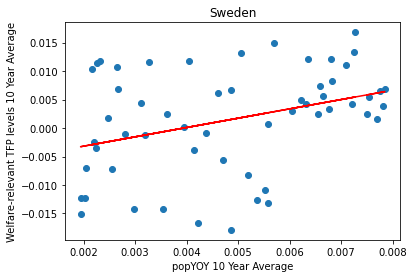

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


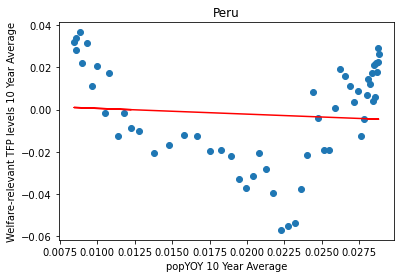

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


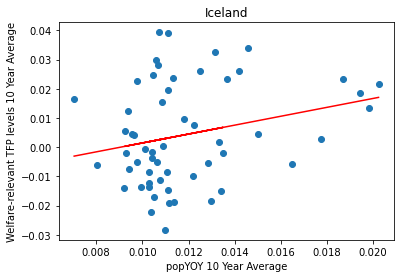

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


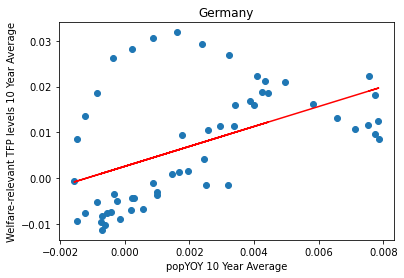

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


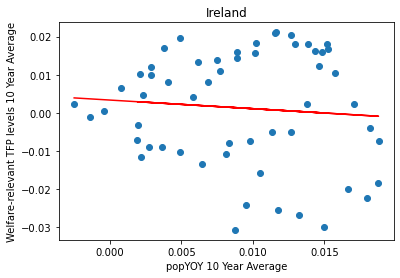

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


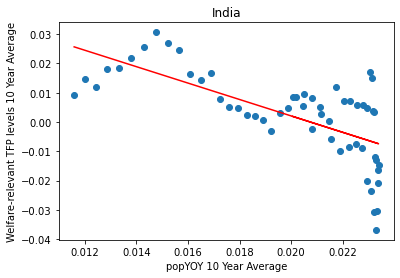

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


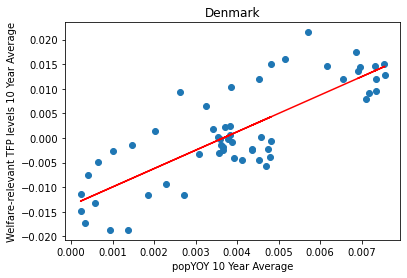

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


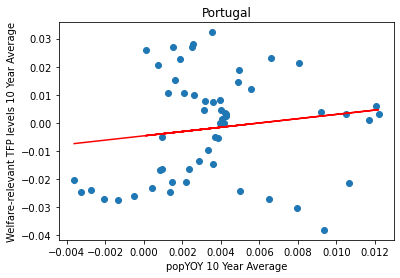

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


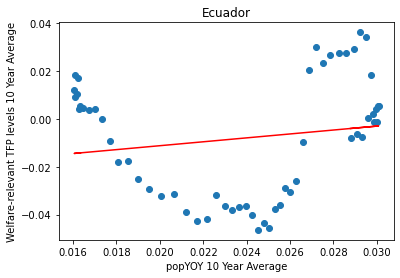

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


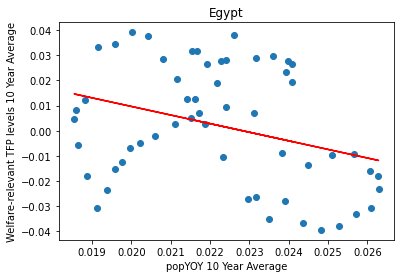

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


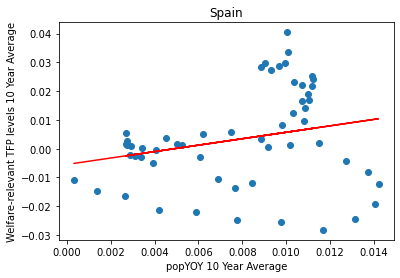

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


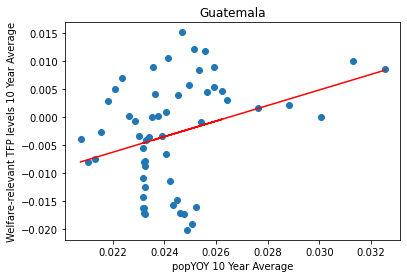

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


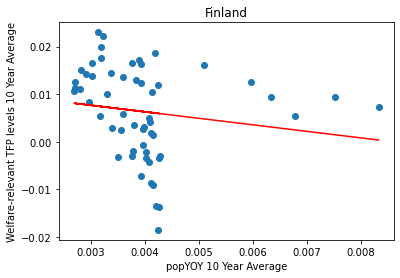

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


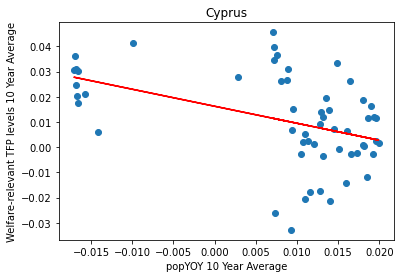

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


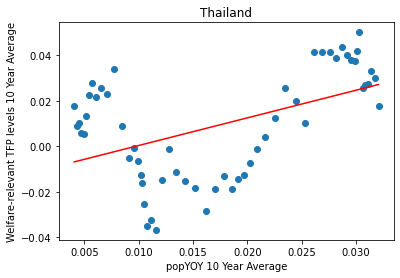

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


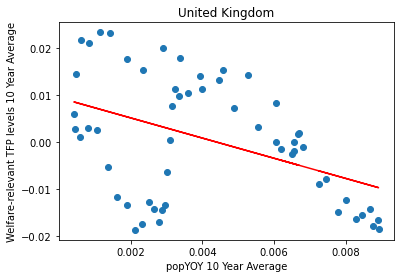

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


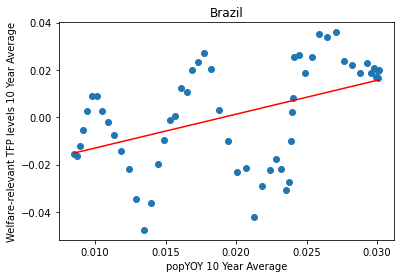

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


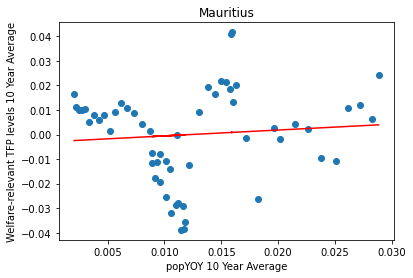

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


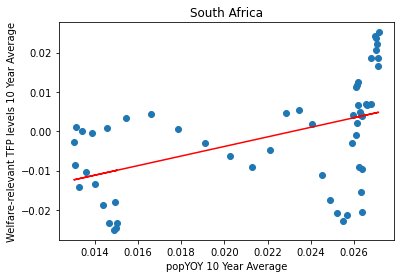

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


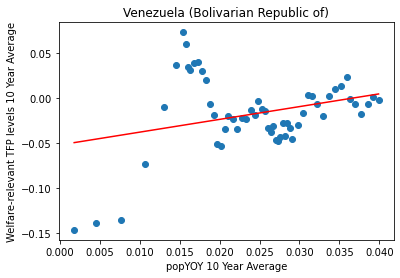

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


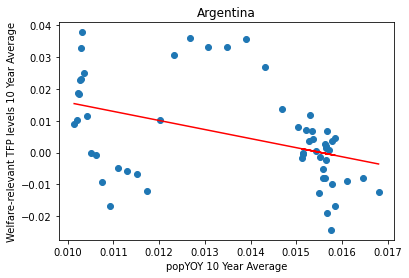

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


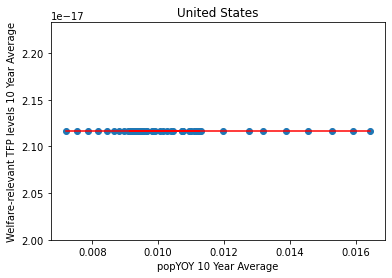

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


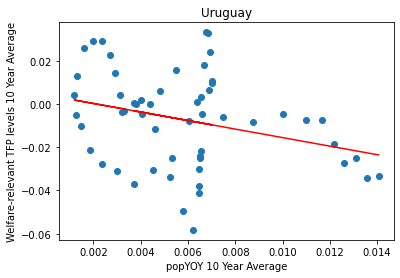

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


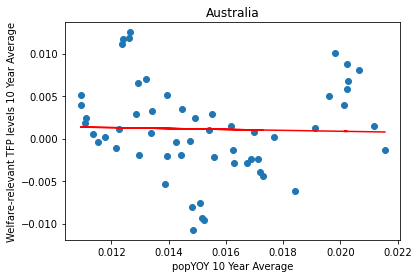

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


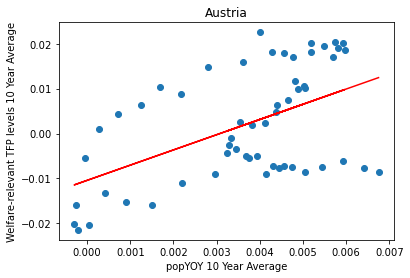

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


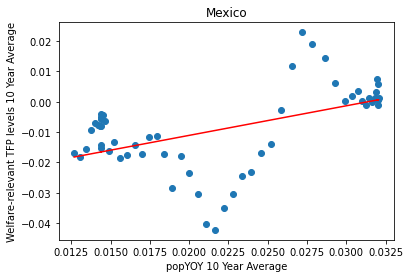

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


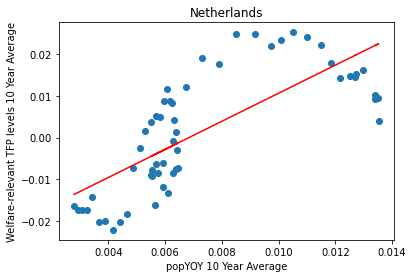

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


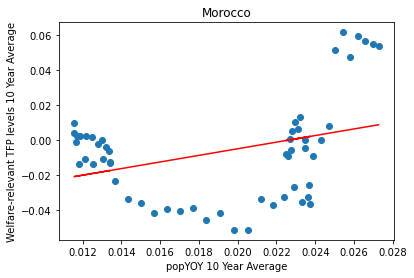

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


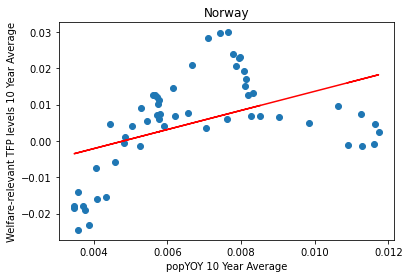

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


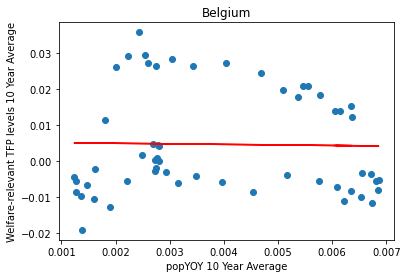

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


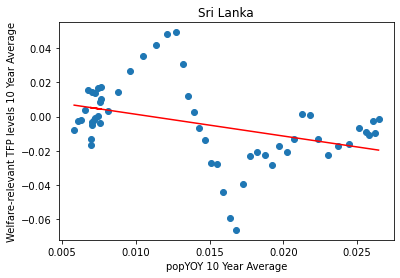

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


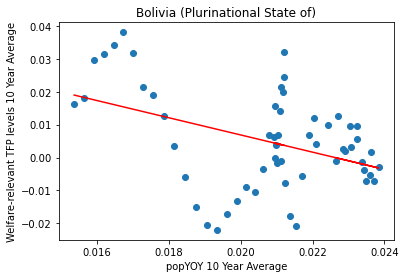

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


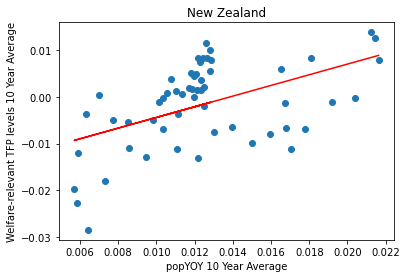

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


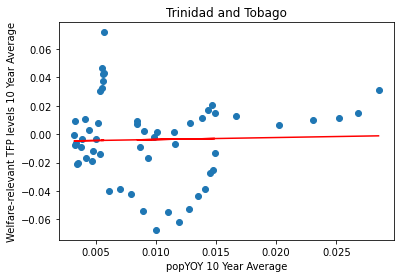

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


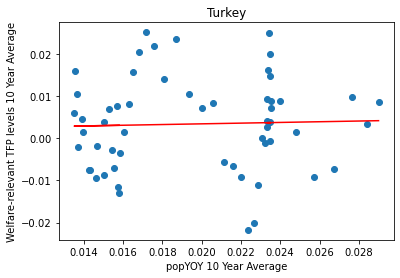

C:\Users\Joshua\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


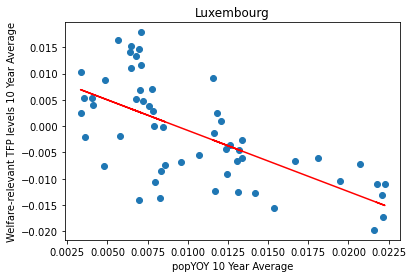

In [13]:
for i in country_list:
    #define data
    x = df_tfp.loc[i,'popYOY10y']
    y = df_tfp.loc[i,'cwtfpYOY10y']
    x.dropna(inplace=True)
    y.dropna(inplace=True)

    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)

    #add line of best fit to plot
    plt.plot(x, a*x+b, color = 'r')
    plt.xlabel("popYOY 10 Year Average")
    plt.ylabel("Welfare-relevant TFP levels 10 Year Average")
    plt.title(i[4:])
    plt.show()

In [14]:
Ken_Jpn_USA = ['KEN_Kenya','JPN_Japan','USA_United States']
df_Ken_Jpn_USA = df_countries.loc[Ken_Jpn_USA]
df_Ken_Jpn_USA.to_excel("Ken_Jpn_USA.xlsx", sheet_name='Ken_Jpn_USA')